In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

## Data Preprocessing

In [2]:
df = pd.read_csv('train.csv')
df.head()

C:\Users\Pratik\AppData\Local\Temp/ipykernel_3792/189615863.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [3]:
df.shape

(1017209, 9)

In [4]:
df_store = pd.read_csv('store.csv')
df_store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [5]:
df_store.shape

(1115, 10)

Here as we can see that all the features in the store dataframe are unique to the 'store' variable. So we can merge this dataframe to our train dataframe on 'store' variable

In [6]:
master_df = pd.merge(left=df,right=df_store,on='Store')
master_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

In [7]:
master_df.shape

(1017209, 18)

### Feature Engineering

In [8]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### Handling missing values

In [9]:
round(master_df.isnull().sum()/master_df.shape[0],2)*100

Store                         0.0
DayOfWeek                     0.0
Date                          0.0
Sales                         0.0
Customers                     0.0
Open                          0.0
Promo                         0.0
StateHoliday                  0.0
SchoolHoliday                 0.0
StoreType                     0.0
Assortment                    0.0
CompetitionDistance           0.0
CompetitionOpenSinceMonth    32.0
CompetitionOpenSinceYear     32.0
Promo2                        0.0
Promo2SinceWeek              50.0
Promo2SinceYear              50.0
PromoInterval                50.0
dtype: float64

In [10]:
# We will remove the features in which we have more than 30% null values as imputing these values would affect our data

cols_to_remove = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
master_df = master_df.drop(cols_to_remove,axis=1)

In [11]:
round(master_df.isnull().sum()/master_df.shape[0],2)*100

Store                  0.0
DayOfWeek              0.0
Date                   0.0
Sales                  0.0
Customers              0.0
Open                   0.0
Promo                  0.0
StateHoliday           0.0
SchoolHoliday          0.0
StoreType              0.0
Assortment             0.0
CompetitionDistance    0.0
Promo2                 0.0
dtype: float64

In [12]:
master_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  Promo2  
0              1         c          a               1270.0       0  
1              1         c          a               1270.0       0  
2              1         c          a               1270.0       0  
3              1         c          a               1270.0       0  
4              1         c          a               1270.0       0

In [13]:
# Store and DayOfWeek are already encoded, let's analyse Date variable
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Date                 1017209 non-null  object 
 3   Sales                1017209 non-null  int64  
 4   Customers            1017209 non-null  int64  
 5   Open                 1017209 non-null  int64  
 6   Promo                1017209 non-null  int64  
 7   StateHoliday         1017209 non-null  object 
 8   SchoolHoliday        1017209 non-null  int64  
 9   StoreType            1017209 non-null  object 
 10  Assortment           1017209 non-null  object 
 11  CompetitionDistance  1014567 non-null  float64
 12  Promo2               1017209 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 108.6+ MB


In [14]:
# Let's convert 'Date' into datetime so that it will be easy for us
master_df['Date'] = pd.to_datetime(master_df['Date'],format='%Y-%m-%d')

In [15]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  object        
 10  Assortment           1017209 non-null  object        
 11  CompetitionDistance  1014567 non-null  float64       
 12  Promo2               1017209 non-null  int64         
dt

In [16]:
master_df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      1          4 2015-07-30   5020        546     1      1            0   
2      1          3 2015-07-29   4782        523     1      1            0   
3      1          2 2015-07-28   5011        560     1      1            0   
4      1          1 2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  Promo2  
0              1         c          a               1270.0       0  
1              1         c          a               1270.0       0  
2              1         c          a               1270.0       0  
3              1         c          a               1270.0       0  
4              1         c          a               1270.0       0

In [17]:
round(master_df['Open'].value_counts()/master_df.shape[0],2)*100

1    83.0
0    17.0
Name: Open, dtype: float64

In [18]:
round(master_df['Promo'].value_counts()/master_df.shape[0],2)*100

0    62.0
1    38.0
Name: Promo, dtype: float64

In [19]:
round(master_df['StateHoliday'].value_counts()/master_df.shape[0],2)*100

0    84.0
0    13.0
a     2.0
b     1.0
c     0.0
Name: StateHoliday, dtype: float64

In [20]:
round(master_df['SchoolHoliday'].value_counts()/master_df.shape[0],2)*100

0    82.0
1    18.0
Name: SchoolHoliday, dtype: float64

In [21]:
round(master_df['Promo2'].value_counts()/master_df.shape[0],2)*100

1    50.0
0    50.0
Name: Promo2, dtype: float64

In [22]:
round(master_df['Assortment'].value_counts()/master_df.shape[0],2)*100

a    53.0
c    46.0
b     1.0
Name: Assortment, dtype: float64

In [23]:
# 'StateHoliday' has very less significant values and hence there is an imbalance. So we can remove. Also 'StoreType'
# and 'Assortment' don't play significant role to analyse sales

cols_to_remove2 = ['StateHoliday','StoreType','Assortment']

master_df = master_df.drop(cols_to_remove2,axis=1)

In [24]:
master_df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5 2015-07-31   5263        555     1      1              1   
1      1          4 2015-07-30   5020        546     1      1              1   
2      1          3 2015-07-29   4782        523     1      1              1   
3      1          2 2015-07-28   5011        560     1      1              1   
4      1          1 2015-07-27   6102        612     1      1              1   

   CompetitionDistance  Promo2  
0               1270.0       0  
1               1270.0       0  
2               1270.0       0  
3               1270.0       0  
4               1270.0       0

In [25]:
# At last, we just want to analyse data for the key data stores according to the problem statement. 
#These stores are numbered - 1,3,8,9,13,25,29,31 and 46.

In [26]:
stores_to_keep = [1,3,8,9,13,25,29,31,46]
master_df = master_df[master_df['Store'].isin(stores_to_keep)]

In [27]:
pd.unique(master_df['Store']).shape

(9,)

In [28]:
master_df.shape

(8110, 10)

So this is our final dataset. Let's start visualising the data

### Data Visualising

<AxesSubplot:>

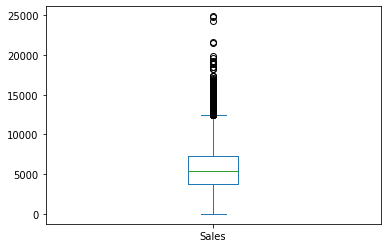

In [29]:
master_df['Sales'].plot.box()

<AxesSubplot:>

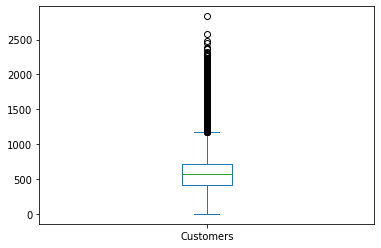

In [30]:
master_df['Customers'].plot.box()

As we can see that there are many outliers. And we will now check the effext of these outliers

<AxesSubplot:>

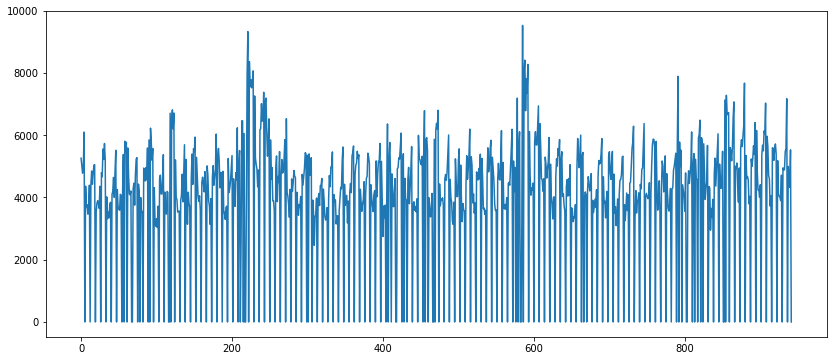

In [31]:
master_df[master_df['Store']==1]['Sales'].plot(figsize=(14,6))

<AxesSubplot:>

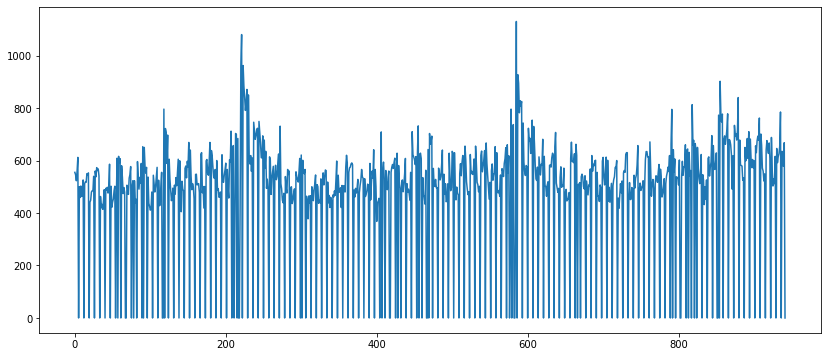

In [32]:
master_df[master_df['Store']==1]['Customers'].plot(figsize=(14,6))

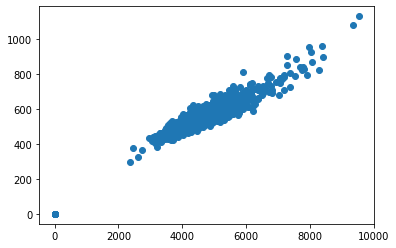

In [33]:
plt.scatter(master_df[master_df['Store']==1]['Sales'],master_df[master_df['Store']==1]['Customers'])

As we can see that we are not getting proper plots duw to outliers. Now we will try to cap the outliers to 95th percentile

In [34]:
master_df.shape

(8110, 10)

## Store 1

In [49]:
final_store1_df = master_df[master_df['Store'] == 1]

In [50]:
final_store1_df.shape

(942, 10)

In [51]:
final_store1_df.dropna(inplace=True)

C:\Users\Pratik\AppData\Local\Temp/ipykernel_3792/1855595522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_store1_df.dropna(inplace=True)


In [52]:
final_store1_df.set_index('Date',inplace=True)

In [53]:
final_store1_df.sort_index(axis=0,inplace=True,ascending=True)

C:\Users\Pratik\AppData\Local\Temp/ipykernel_3792/2383557640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_store1_df.sort_index(axis=0,inplace=True,ascending=True)


In [129]:
final_store1_df.head()

Store  DayOfWeek   Sales  Customers  Open  Promo  SchoolHoliday  \
Date                                                                          
2013-01-01      1          2  3430.0        0.0     0      0              1   
2013-01-02      1          3  5530.0      668.0     1      0              1   
2013-01-03      1          4  4327.0      578.0     1      0              1   
2013-01-04      1          5  4486.0      619.0     1      0              1   
2013-01-05      1          6  4997.0      635.0     1      0              1   

            CompetitionDistance  Promo2  
Date                                     
2013-01-01               1270.0       0  
2013-01-02               1270.0       0  
2013-01-03               1270.0       0  
2013-01-04               1270.0       0  
2013-01-05               1270.0       0

### Visualising and Outliers Treatment

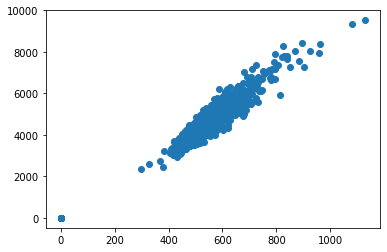

In [118]:
plt.scatter(final_store1_df['Customers'],final_store1_df['Sales'])

As we can see there is a linear trend but there are outliers present..We need to cap the outliers

In [140]:
def cap_outliers(Dataframe,col_name):
    lower_percentile = 0.05
    higher_percentile = 0.95
    
    test_list = []
    for i in Dataframe[col_name]:
        if i==0.0:
            continue
        else:
            test_list.append(i)
    
    low, high = pd.Series(test_list).quantile([lower_percentile, higher_percentile])
    Dataframe[col_name] = np.where(Dataframe[col_name] < low,low,Dataframe[col_name])
    Dataframe[col_name] = np.where(Dataframe[col_name] > high,high,Dataframe[col_name])
    return Dataframe

In [135]:
final_store1_df_capped = cap_outliers(final_store1_df,'Sales')

3430.0 6380.429499999998


C:\Users\Pratik\AppData\Local\Temp/ipykernel_3792/2776850749.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe[col_name] = np.where(Dataframe[col_name] < low,low,Dataframe[col_name])
C:\Users\Pratik\AppData\Local\Temp/ipykernel_3792/2776850749.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe[col_name] = np.where(Dataframe[col_name] > high,high,Dataframe[col_name])


In [138]:
final_store1_df_capped = cap_outliers(final_store1_df,'Customers')

446.0 723.0


C:\Users\Pratik\AppData\Local\Temp/ipykernel_3792/2776850749.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe[col_name] = np.where(Dataframe[col_name] < low,low,Dataframe[col_name])
C:\Users\Pratik\AppData\Local\Temp/ipykernel_3792/2776850749.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataframe[col_name] = np.where(Dataframe[col_name] > high,high,Dataframe[col_name])


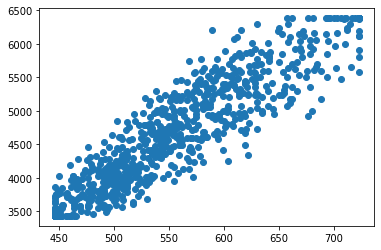

In [139]:
plt.scatter(final_store1_df_capped['Customers'],final_store1_df_capped['Sales'])

<AxesSubplot:>

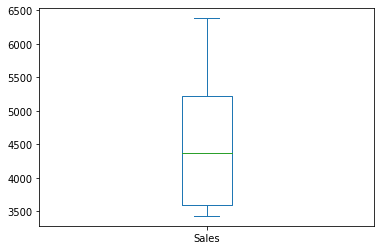

In [152]:
final_store1_df_capped['Sales'].plot.box()

<AxesSubplot:>

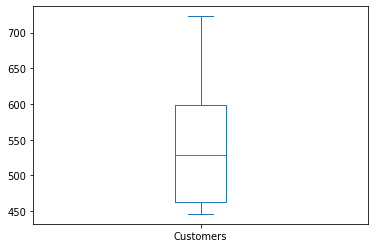

In [153]:
final_store1_df_capped['Customers'].plot.box()

Now the data looks proper as we have capped the outliers

<AxesSubplot:xlabel='Date'>

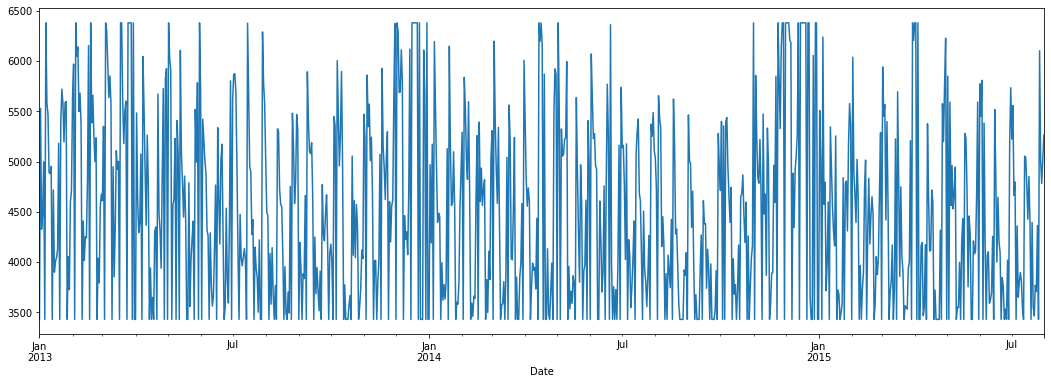

In [144]:
final_store1_df_capped['Sales'].plot(figsize=(18,6))

<AxesSubplot:xlabel='Date'>

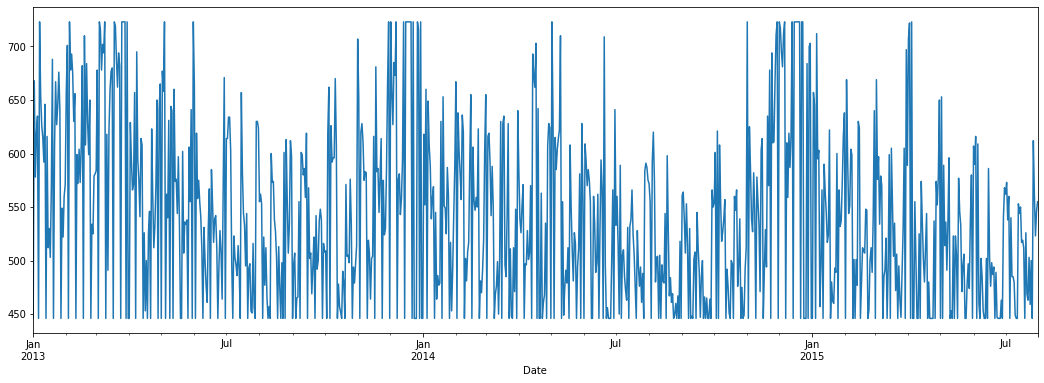

In [145]:
final_store1_df_capped['Customers'].plot(figsize=(18,6))

In [169]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

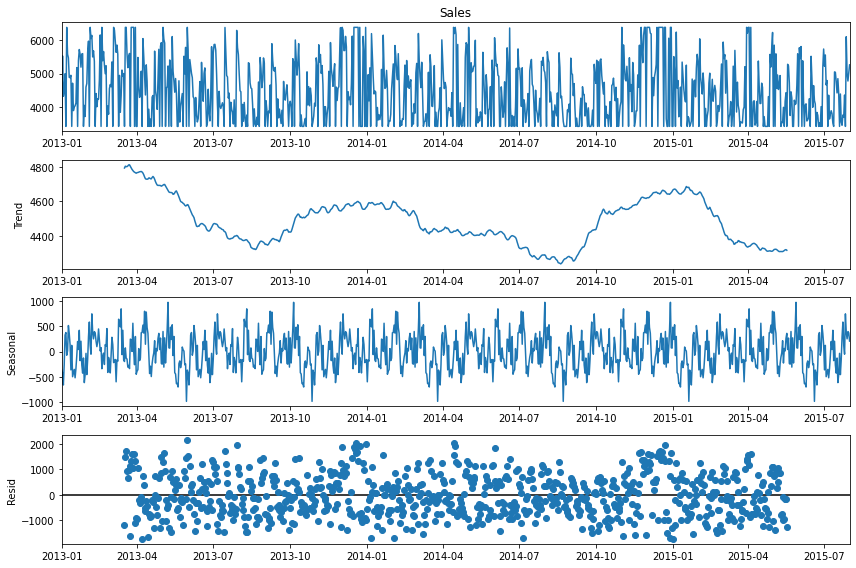

In [170]:
decomposition_sales = sm.tsa.seasonal_decompose(final_store1_df_capped['Sales'], model='additive', period = 150)
fig = decomposition_sales.plot()
plt.show()

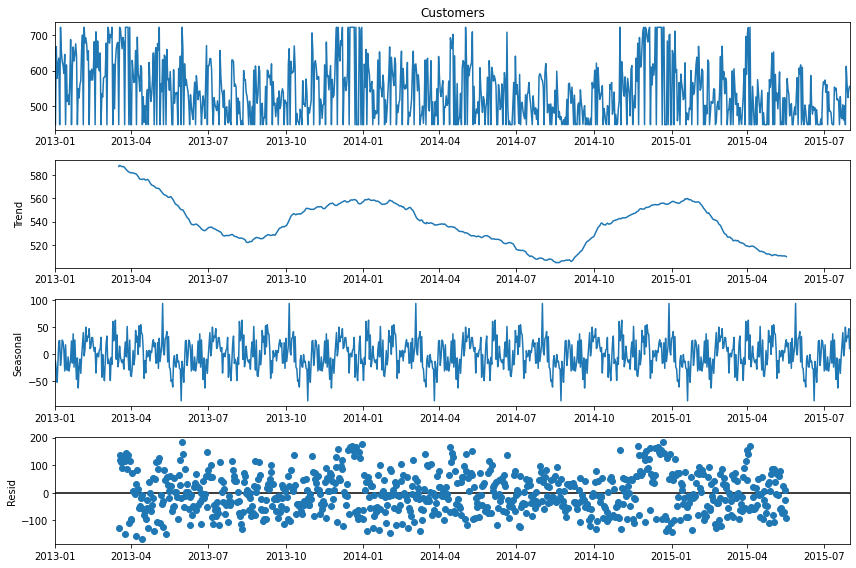

In [171]:
decomposition_customers = sm.tsa.seasonal_decompose(final_store1_df_capped['Customers'], model='additive', period = 150)
fig = decomposition_customers.plot()
plt.show()

As we can see that there is a seasonal effect in this data

### Stationarity check

In [150]:
adf_final_store1_sales = adfuller(final_store1_df_capped['Sales'])
print('ADF Statistic: %f' % adf_final_store1_sales[0])
print('Critical Values @ 0.05: %.2f' % adf_final_store1_sales[4]['5%'])
print('p-value: %f' % adf_final_store1_sales[1])

ADF Statistic: -4.883322
Critical Values @ 0.05: -2.86
p-value: 0.000038


In [151]:
adf_final_store1_cust = adfuller(final_store1_df_capped['Customers'])
print('ADF Statistic: %f' % adf_final_store1_cust[0])
print('Critical Values @ 0.05: %.2f' % adf_final_store1_cust[4]['5%'])
print('p-value: %f' % adf_final_store1_cust[1])

ADF Statistic: -3.798066
Critical Values @ 0.05: -2.86
p-value: 0.002927


Here we can see that the p-value is below 0.05 and  hence the series is stationary. We can move forward to plot PACF and ACF plots

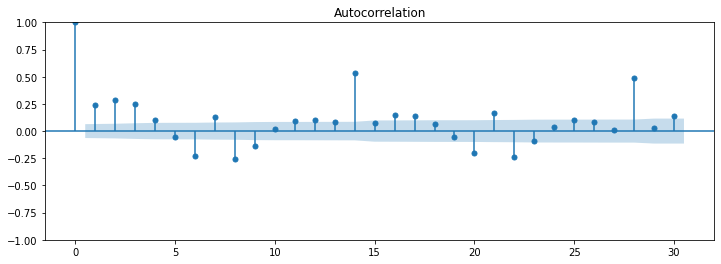

In [161]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(final_store1_df['Sales'], ax=plt.gca(), lags = 30)
plt.show()

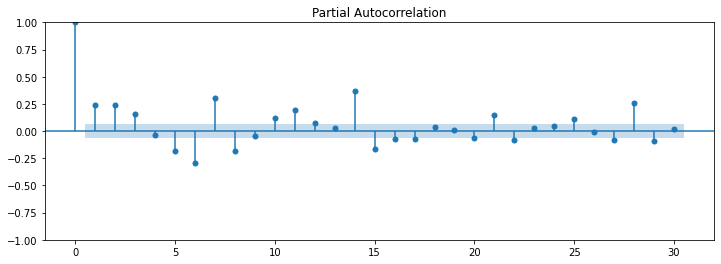

In [162]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(final_store1_df['Sales'], ax=plt.gca(), lags = 30)
plt.show()

### Splitting into train-test

In [163]:
final_store1_df_capped.head(639)

Store  DayOfWeek   Sales  Customers  Open  Promo  SchoolHoliday  \
Date                                                                          
2013-01-01      1          2  3430.0      446.0     0      0              1   
2013-01-02      1          3  5530.0      668.0     1      0              1   
2013-01-03      1          4  4327.0      578.0     1      0              1   
2013-01-04      1          5  4486.0      619.0     1      0              1   
2013-01-05      1          6  4997.0      635.0     1      0              1   
...           ...        ...     ...        ...   ...    ...            ...   
2014-09-27      1          6  3914.0      464.0     1      0              0   
2014-09-28      1          7  3430.0      446.0     0      0              0   
2014-09-29      1          1  5280.0      566.0     1      1              0   
2014-09-30      1          2  4919.0      550.0     1      1              0   
2014-10-01      1          3  4712.0      554.0     1      1              0   

            CompetitionDistance  Promo2  
Date                                     
2013-01-01               1270.0       0  
2013-01-02               1270.0       0  
2013-01-03               1270.0       0  
2013-01-04               1270.0       0  
2013-01-05               1270.0       0  
...                         ...     ...  
2014-09-27               1270.0       0  
2014-09-28               1270.0       0  
2014-09-29               1270.0       0  
2014-09-30               1270.0       0  
2014-10-01               1270.0       0  

[639 rows x 9 columns]

In [164]:
df_train = final_store1_df_capped.loc['2013-01-01':'2014-09-30']
df_test = final_store1_df_capped.loc['2014-10-01':]

In [165]:
df_train.shape

(638, 9)

In [166]:
df_test.shape

(304, 9)

In [167]:
df_train.tail()

Store  DayOfWeek   Sales  Customers  Open  Promo  SchoolHoliday  \
Date                                                                          
2014-09-26      1          5  3518.0      446.0     1      0              0   
2014-09-27      1          6  3914.0      464.0     1      0              0   
2014-09-28      1          7  3430.0      446.0     0      0              0   
2014-09-29      1          1  5280.0      566.0     1      1              0   
2014-09-30      1          2  4919.0      550.0     1      1              0   

            CompetitionDistance  Promo2  
Date                                     
2014-09-26               1270.0       0  
2014-09-27               1270.0       0  
2014-09-28               1270.0       0  
2014-09-29               1270.0       0  
2014-09-30               1270.0       0

In [168]:
df_test.head()

Store  DayOfWeek   Sales  Customers  Open  Promo  SchoolHoliday  \
Date                                                                          
2014-10-01      1          3  4712.0      554.0     1      1              0   
2014-10-02      1          4  5400.0      601.0     1      1              0   
2014-10-03      1          5  3430.0      446.0     0      1              0   
2014-10-04      1          6  5355.0      621.0     1      0              0   
2014-10-05      1          7  3430.0      446.0     0      0              0   

            CompetitionDistance  Promo2  
Date                                     
2014-10-01               1270.0       0  
2014-10-02               1270.0       0  
2014-10-03               1270.0       0  
2014-10-04               1270.0       0  
2014-10-05               1270.0       0

### Modelling

We will first start with a basic AR model and gradually will build other models and we will select the model which gives minimum error

### AR model

In [176]:
from statsmodels.tsa.arima.model import ARIMA
ar_model = ARIMA(df_train['Sales'], order=(29, 0, 0))  #p-value we can give as 29 from PACF plot
ar_model_fit = ar_model.fit()
print(ar_model_fit.params)

const       4503.001091
ar.L1          0.285511
ar.L2          0.199945
ar.L3          0.153111
ar.L4         -0.076757
ar.L5         -0.033217
ar.L6         -0.077813
ar.L7          0.027253
ar.L8         -0.025253
ar.L9         -0.115257
ar.L10         0.047440
ar.L11         0.010733
ar.L12         0.040990
ar.L13         0.045584
ar.L14         0.322825
ar.L15        -0.100637
ar.L16        -0.040155
ar.L17        -0.099916
ar.L18         0.015570
ar.L19         0.020153
ar.L20        -0.034668
ar.L21         0.134498
ar.L22        -0.111139
ar.L23         0.044636
ar.L24         0.026983
ar.L25         0.063444
ar.L26        -0.088398
ar.L27        -0.079404
ar.L28         0.263488
ar.L29        -0.068362
sigma2    366568.706019
dtype: float64


In [177]:
ar_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  638
Model:                ARIMA(29, 0, 0)   Log Likelihood               -4994.519
Date:                Tue, 26 Apr 2022   AIC                          10051.039
Time:                        09:17:58   BIC                          10189.247
Sample:                    01-01-2013   HQIC                         10104.692
                         - 09-30-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4503.0011    112.132     40.158      0.000    4283.226    4722.777
ar.L1          0.2855      0.035      8.249      0.000       0.218       0.353
ar.L2          0.1999      0.041      4.901      0.000       0.120       0.280
ar.L3          0.1531      0.039      3.935      0.000       0.077       0.229
ar.L4         -0.0768      0.039     -1.987      0.047      -0.152      -0.001
ar.L5         -0.0332      0.043     -0.769      0.442      -0.118       0.051
ar.L6         -0.0778      0.044     -1.779      0.075      -0.164       0.008
ar.L7          0.0273      0.045      0.611      0.541      -0.060       0.115
ar.L8         -0.0253      0.044     -0.577      0.564      -0.111       0.061
ar.L9         -0.1153      0.044     -2.594      0.009      -0.202      -0.028
ar.L10         0.0474      0.043      1.099      0.272      -0.037       0.132
ar.L11         0.0107      0.042      0.258      0.796      -0.071       0.092
ar.L12         0.0410      0.042      0.979      0.327      -0.041       0.123
ar.L13         0.0456      0.042      1.078      0.281      -0.037       0.128
ar.L14         0.3228      0.040      8.108      0.000       0.245       0.401
ar.L15        -0.1006      0.040     -2.514      0.012      -0.179      -0.022
ar.L16        -0.0402      0.042     -0.966      0.334      -0.122       0.041
ar.L17        -0.0999      0.038     -2.664      0.008      -0.173      -0.026
ar.L18         0.0156      0.039      0.400      0.689      -0.061       0.092
ar.L19         0.0202      0.044      0.458      0.647      -0.066       0.106
ar.L20        -0.0347      0.043     -0.804      0.421      -0.119       0.050
ar.L21         0.1345      0.044      3.080      0.002       0.049       0.220
ar.L22        -0.1111      0.044     -2.531      0.011      -0.197      -0.025
ar.L23         0.0446      0.048      0.932      0.351      -0.049       0.138
ar.L24         0.0270      0.042      0.645      0.519      -0.055       0.109
ar.L25         0.0634      0.041      1.533      0.125      -0.018       0.145
ar.L26        -0.0884      0.045     -1.978      0.048      -0.176      -0.001
ar.L27        -0.0794      0.043     -1.830      0.067      -0.164       0.006
ar.L28         0.2635      0.038      6.944      0.000       0.189       0.338
ar.L29        -0.0684      0.039     -1.760      0.078      -0.144       0.008
sigma2      3.666e+05   1.94e+04     18.936      0.000    3.29e+05    4.05e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                54.31
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using t

In [179]:
start_index = df_test.index.min()
end_index = df_test.index.max()

In [188]:
ar_predictions = pd.DataFrame(ar_model_fit.predict(start=start_index, end=end_index))

In [181]:
from sklearn.metrics import mean_squared_error

In [192]:
ar_rmse = math.sqrt(mean_squared_error(df_test['Sales'],ar_predictions))
ar_rmse

918.5750473777366

Here the model seems to not perform well as AIC is more. Let's make predictions on test set

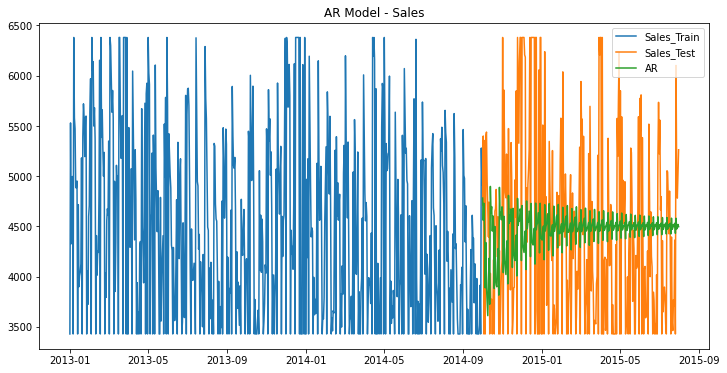

In [193]:
plt.figure(figsize=(12,6)) 
plt.plot( df_train['Sales'], label='Sales_Train')
plt.plot(df_test['Sales'], label='Sales_Test')
plt.plot(ar_predictions, label='AR')
plt.legend(loc='best')
plt.title('AR Model - Sales')
plt.show()

In [194]:
def get_result_df(res_dict):
    return pd.DataFrame.from_dict(res_dict).set_index('model')

In [195]:
res_dict = {'model' : ['AR'], 'RMSE' : [ar_rmse]}

In [196]:
result_df = get_result_df(res_dict)

In [197]:
result_df

RMSE
model            
AR     918.575047

### MA model

In [202]:
ma_model = ARIMA(df_train['Sales'], order=(0, 0, 30))   # q values as 9 from ACF plot
ma_model_fit = ma_model.fit()
print(ma_model_fit.params)

const       4502.982971
ma.L1          0.224844
ma.L2          0.235613
ma.L3          0.282990
ma.L4          0.091690
ma.L5         -0.024649
ma.L6         -0.072846
ma.L7          0.014956
ma.L8         -0.051012
ma.L9         -0.185972
ma.L10         0.028854
ma.L11        -0.043472
ma.L12         0.023242
ma.L13         0.026635
ma.L14         0.431459
ma.L15         0.097208
ma.L16         0.115389
ma.L17         0.089796
ma.L18         0.001466
ma.L19        -0.086932
ma.L20        -0.089305
ma.L21         0.027634
ma.L22        -0.117770
ma.L23        -0.040746
ma.L24         0.035277
ma.L25         0.020893
ma.L26         0.059769
ma.L27        -0.029906
ma.L28         0.347952
ma.L29        -0.010709
ma.L30         0.099244
sigma2    531425.962761
dtype: float64


In [203]:
ma_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  638
Model:                ARIMA(0, 0, 30)   Log Likelihood               -5055.963
Date:                Tue, 26 Apr 2022   AIC                          10175.927
Time:                        09:48:35   BIC                          10318.594
Sample:                    01-01-2013   HQIC                         10231.311
                         - 09-30-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4502.9830     88.842     50.685      0.000    4328.856    4677.110
ma.L1          0.2248      0.044      5.069      0.000       0.138       0.312
ma.L2          0.2356      0.050      4.752      0.000       0.138       0.333
ma.L3          0.2830      0.048      5.915      0.000       0.189       0.377
ma.L4          0.0917      0.048      1.922      0.055      -0.002       0.185
ma.L5         -0.0246      0.050     -0.489      0.625      -0.124       0.074
ma.L6         -0.0728      0.047     -1.544      0.123      -0.165       0.020
ma.L7          0.0150      0.052      0.290      0.772      -0.086       0.116
ma.L8         -0.0510      0.058     -0.880      0.379      -0.165       0.063
ma.L9         -0.1860      0.052     -3.552      0.000      -0.289      -0.083
ma.L10         0.0289      0.054      0.536      0.592      -0.077       0.134
ma.L11        -0.0435      0.054     -0.800      0.424      -0.150       0.063
ma.L12         0.0232      0.057      0.409      0.683      -0.088       0.135
ma.L13         0.0266      0.053      0.506      0.613      -0.077       0.130
ma.L14         0.4315      0.051      8.425      0.000       0.331       0.532
ma.L15         0.0972      0.055      1.773      0.076      -0.010       0.205
ma.L16         0.1154      0.060      1.921      0.055      -0.002       0.233
ma.L17         0.0898      0.055      1.643      0.100      -0.017       0.197
ma.L18         0.0015      0.054      0.027      0.978      -0.104       0.107
ma.L19        -0.0869      0.056     -1.550      0.121      -0.197       0.023
ma.L20        -0.0893      0.053     -1.692      0.091      -0.193       0.014
ma.L21         0.0276      0.053      0.523      0.601      -0.076       0.131
ma.L22        -0.1178      0.054     -2.181      0.029      -0.224      -0.012
ma.L23        -0.0407      0.055     -0.744      0.457      -0.148       0.067
ma.L24         0.0353      0.054      0.655      0.512      -0.070       0.141
ma.L25         0.0209      0.054      0.386      0.700      -0.085       0.127
ma.L26         0.0598      0.054      1.115      0.265      -0.045       0.165
ma.L27        -0.0299      0.054     -0.559      0.576      -0.135       0.075
ma.L28         0.3480      0.055      6.342      0.000       0.240       0.455
ma.L29        -0.0107      0.052     -0.205      0.837      -0.113       0.091
ma.L30         0.0992      0.049      2.026      0.043       0.003       0.195
sigma2      5.314e+05   3.99e+04     13.335      0.000    4.53e+05     6.1e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.47
Prob(Q):                              0.97   Prob(JB):                         0.02
Heteroskedasticity (H):               0.69   Skew:                             0.22
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.30
========================================================

In [204]:
ma_predictions = ma_model_fit.predict(start=start_index, end=end_index)
ma_rmse = math.sqrt(mean_squared_error(df_test['Sales'],ma_predictions))
ma_rmse

947.7860806626782

In [207]:
res_dict = {'model' : ['AR','MA'], 'RMSE' : [ar_rmse,ma_rmse]}

In [208]:
result_df = get_result_df(res_dict)
result_df

RMSE
model            
AR     918.575047
MA     947.786081

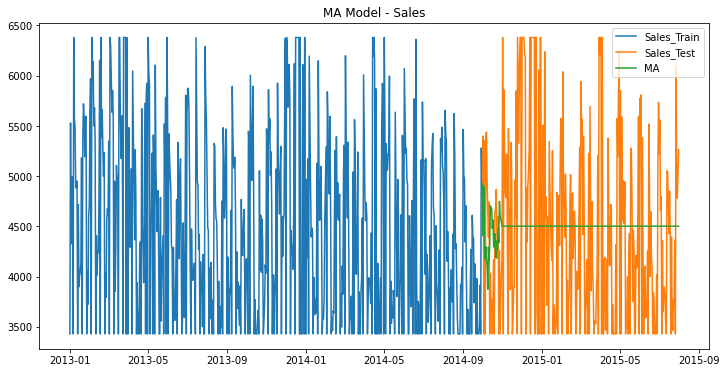

In [216]:
plt.figure(figsize=(12,6)) 
plt.plot( df_train['Sales'], label='Sales_Train')
plt.plot(df_test['Sales'], label='Sales_Test')
plt.plot(ma_predictions, label='MA')
plt.legend(loc='best')
plt.title('MA Model - Sales')
plt.show()

### ARMA model

In [212]:
arma_model = ARIMA(df_train['Sales'], order=(29, 0, 30))   # p,q values from PACF,ACF plots resp
arma_model_fit = arma_model.fit()

In [213]:
arma_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  638
Model:               ARIMA(29, 0, 30)   Log Likelihood               -4974.265
Date:                Tue, 26 Apr 2022   AIC                          10070.530
Time:                        09:58:01   BIC                          10342.489
Sample:                    01-01-2013   HQIC                         10176.105
                         - 09-30-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4503.0011    126.408     35.623      0.000    4255.245    4750.757
ar.L1          0.3459      2.233      0.155      0.877      -4.030       4.722
ar.L2          0.2292      0.523      0.438      0.661      -0.797       1.255
ar.L3         -0.1965      0.512     -0.384      0.701      -1.199       0.806
ar.L4         -0.0733      0.508     -0.144      0.885      -1.068       0.922
ar.L5          0.3215      0.400      0.803      0.422      -0.463       1.106
ar.L6          0.0088      0.811      0.011      0.991      -1.580       1.598
ar.L7         -0.1469      0.287     -0.512      0.609      -0.710       0.416
ar.L8         -0.0091      0.435     -0.021      0.983      -0.861       0.843
ar.L9         -0.0080      0.262     -0.030      0.976      -0.522       0.506
ar.L10         0.0704      0.191      0.368      0.713      -0.305       0.445
ar.L11        -0.0904      0.276     -0.328      0.743      -0.631       0.450
ar.L12        -0.1055      0.228     -0.463      0.643      -0.552       0.341
ar.L13         0.2435      0.348      0.700      0.484      -0.439       0.926
ar.L14         0.0764      0.465      0.164      0.870      -0.835       0.988
ar.L15        -0.1100      0.324     -0.339      0.734      -0.745       0.525
ar.L16         0.0194      0.298      0.065      0.948      -0.566       0.604
ar.L17        -0.0210      0.261     -0.081      0.936      -0.532       0.490
ar.L18        -0.0266      0.235     -0.113      0.910      -0.488       0.435
ar.L19        -0.0210      0.258     -0.081      0.935      -0.528       0.486
ar.L20        -0.1873      0.257     -0.730      0.466      -0.690       0.316
ar.L21         0.4195      0.440      0.953      0.340      -0.443       1.282
ar.L22        -0.1667      0.919     -0.181      0.856      -1.969       1.635
ar.L23        -0.2631      0.290     -0.908      0.364      -0.831       0.305
ar.L24         0.1618      0.636      0.254      0.799      -1.085       1.408
ar.L25         0.2020      0.295      0.686      0.493      -0.375       0.779
ar.L26        -0.2076      0.484     -0.429      0.668      -1.157       0.742
ar.L27        -0.1260      0.469     -0.269      0.788      -1.045       0.793
ar.L28         0.5548      0.350      1.586      0.113      -0.131       1.241
ar.L29        -0.1096      1.205     -0.091      0.928      -2.472       2.253
ma.L1         -0.0297      2.230     -0.013      0.989      -4.401       4.342
ma.L2         -0.0431      0.654     -0.066      0.947      -1.326       1.239
ma.L3          0.3083      0.515      0.598      0.550      -0.702       1.318
ma.L4          0.0821      0.856      0.096      0.924      -1.595       1.759
ma.L5         -0.2766      0.441     -0.627      0.531      -1.141       0.588
ma.L6         -0.0946      0.624     -0.151      0.880      -1.318       1.129
ma.L7          0.0229      0.357      0.064      0.949      -0.677       0.723
ma.L8         -0.0608      0.218     -0.279      0.780      -0.488       0.366
ma

In [214]:
arma_predictions = arma_model_fit.predict(start=start_index, end=end_index)
arma_rmse = math.sqrt(mean_squared_error(df_test['Sales'],arma_predictions))
arma_rmse

878.6478619102523

In [215]:
res_dict = {'model' : ['AR','MA','ARMA'], 'RMSE' : [ar_rmse,ma_rmse,arma_rmse]}

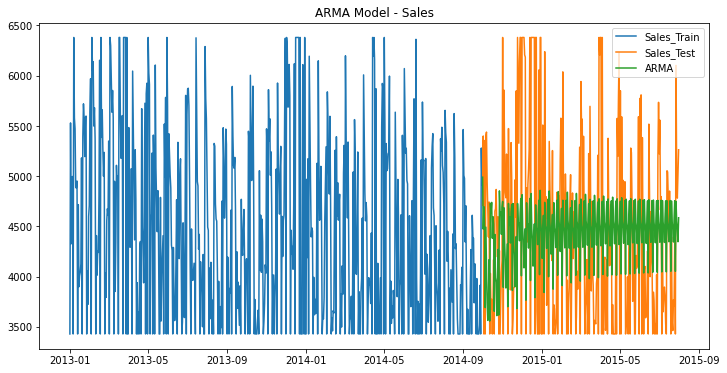

In [217]:
plt.figure(figsize=(12,6)) 
plt.plot( df_train['Sales'], label='Sales_Train')
plt.plot(df_test['Sales'], label='Sales_Test')
plt.plot(arma_predictions, label='ARMA')
plt.legend(loc='best')
plt.title('ARMA Model - Sales')
plt.show()

Now we can use 'Promo', 'SchoolHoliday' and 'Promo2' as our exogenous variables to see if they affect the time series or not

### ARMAX - Promo

In [284]:
armax_promo_model = ARIMA(df_train['Sales'], order=(29, 0, 30), exog=df_train['Promo'])   # p,q values from PACF,ACF plots resp
armax_promo_model_fit = armax_promo_model.fit()

In [286]:
armax_promo_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  638
Model:               ARIMA(29, 0, 30)   Log Likelihood               -4877.862
Date:                Tue, 26 Apr 2022   AIC                           9879.724
Time:                        12:37:32   BIC                          10156.141
Sample:                    01-01-2013   HQIC                          9987.030
                         - 09-30-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4075.1938    294.267     13.849      0.000    3498.440    4651.947
Promo       1151.6506     57.031     20.193      0.000    1039.872    1263.430
ar.L1          0.2258      5.009      0.045      0.964      -9.591      10.042
ar.L2          0.1485      0.394      0.377      0.706      -0.624       0.921
ar.L3         -0.1722      0.701     -0.245      0.806      -1.547       1.203
ar.L4         -0.1473      0.832     -0.177      0.860      -1.779       1.484
ar.L5          0.3619      0.813      0.445      0.656      -1.232       1.956
ar.L6          0.0378      1.770      0.021      0.983      -3.431       3.507
ar.L7         -0.1152      0.541     -0.213      0.831      -1.175       0.945
ar.L8          0.0130      0.576      0.023      0.982      -1.115       1.141
ar.L9          0.0149      0.184      0.081      0.935      -0.347       0.376
ar.L10        -0.0020      0.207     -0.010      0.992      -0.409       0.405
ar.L11        -0.1103      0.176     -0.626      0.531      -0.456       0.235
ar.L12        -0.2132      0.580     -0.368      0.713      -1.350       0.924
ar.L13         0.1311      1.161      0.113      0.910      -2.144       2.406
ar.L14         0.1385      0.431      0.321      0.748      -0.707       0.984
ar.L15        -0.0444      0.784     -0.057      0.955      -1.580       1.491
ar.L16         0.2096      0.244      0.859      0.391      -0.269       0.688
ar.L17         0.0738      1.145      0.064      0.949      -2.171       2.319
ar.L18         0.0968      0.593      0.163      0.870      -1.065       1.259
ar.L19        -0.0782      0.621     -0.126      0.900      -1.294       1.138
ar.L20        -0.1124      0.378     -0.297      0.766      -0.853       0.628
ar.L21         0.2379      0.627      0.380      0.704      -0.990       1.466
ar.L22        -0.0972      1.113     -0.087      0.930      -2.278       2.084
ar.L23        -0.3433      0.319     -1.077      0.282      -0.968       0.282
ar.L24         0.1504      1.782      0.084      0.933      -3.343       3.643
ar.L25         0.2017      0.433      0.465      0.642      -0.648       1.051
ar.L26        -0.0877      1.019     -0.086      0.931      -2.084       1.909
ar.L27        -0.1438      0.359     -0.400      0.689      -0.848       0.560
ar.L28         0.6380      0.731      0.872      0.383      -0.795       2.071
ar.L29        -0.1094      3.099     -0.035      0.972      -6.183       5.965
ma.L1         -0.0949      5.008     -0.019      0.985      -9.910       9.721
ma.L2         -0.0675      0.581     -0.116      0.907      -1.207       1.072
ma.L3          0.3252      0.355      0.915      0.360      -0.371       1.022
ma.L4          0.2145      1.686      0.127      0.899      -3.089       3.518
ma.L5         -0.1940      1.314     -0.148      0.883      -2.770       2.382
ma.L6          0.0232      0.834      0.028      0.978      -1.612       1.659
ma.L7          0.2695      0.233      1.157      0.247      -0.187       0.726
ma

In [287]:
armax_promo_predictions = armax_promo_model_fit.predict(start=start_index, end=end_index,exog=df_test['Promo'])
armax_promo_rmse = math.sqrt(mean_squared_error(df_test['Sales'],armax_promo_predictions))
armax_promo_rmse

764.5238950608681

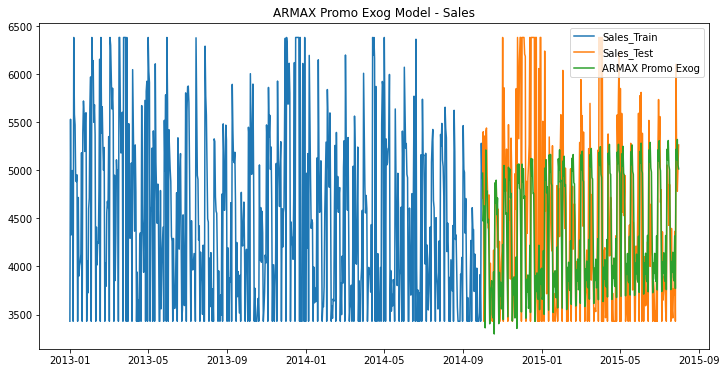

In [289]:
plt.figure(figsize=(12,6)) 
plt.plot( df_train['Sales'], label='Sales_Train')
plt.plot(df_test['Sales'], label='Sales_Test')
plt.plot(armax_promo_predictions, label='ARMAX Promo Exog')
plt.legend(loc='best')
plt.title('ARMAX Promo Exog Model - Sales')
plt.show()

### ARMAX - SchoolHoliday

In [290]:
armax_sh_model = ARIMA(df_train['Sales'], order=(29, 0, 30), exog=df_train['SchoolHoliday'])   # p,q values from PACF,ACF plots resp
armax_sh_model_fit = armax_sh_model.fit()

In [291]:
armax_sh_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  638
Model:               ARIMA(29, 0, 30)   Log Likelihood               -4974.024
Date:                Tue, 26 Apr 2022   AIC                          10072.047
Time:                        12:41:48   BIC                          10348.464
Sample:                    01-01-2013   HQIC                         10179.353
                         - 09-30-2014                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4514.6122    124.597     36.234      0.000    4270.406    4758.819
SchoolHoliday   -51.0889     83.860     -0.609      0.542    -215.451     113.273
ar.L1             0.3050      1.638      0.186      0.852      -2.905       3.515
ar.L2             0.2170      0.422      0.514      0.607      -0.610       1.044
ar.L3            -0.1676      0.396     -0.424      0.672      -0.943       0.608
ar.L4            -0.0718      0.368     -0.195      0.845      -0.793       0.649
ar.L5             0.2896      0.326      0.889      0.374      -0.349       0.928
ar.L6             0.0230      0.553      0.042      0.967      -1.062       1.108
ar.L7            -0.1163      0.238     -0.489      0.625      -0.583       0.350
ar.L8            -0.0066      0.316     -0.021      0.983      -0.626       0.613
ar.L9            -0.0216      0.217     -0.099      0.921      -0.447       0.404
ar.L10            0.0716      0.181      0.396      0.692      -0.283       0.426
ar.L11           -0.0765      0.238     -0.322      0.748      -0.542       0.389
ar.L12           -0.1117      0.185     -0.604      0.546      -0.474       0.251
ar.L13            0.2173      0.285      0.762      0.446      -0.342       0.777
ar.L14            0.0850      0.307      0.277      0.781      -0.516       0.686
ar.L15           -0.0983      0.265     -0.371      0.711      -0.618       0.421
ar.L16            0.0262      0.242      0.108      0.914      -0.448       0.501
ar.L17           -0.0370      0.230     -0.161      0.872      -0.488       0.414
ar.L18           -0.0400      0.209     -0.191      0.848      -0.449       0.369
ar.L19            0.0021      0.232      0.009      0.993      -0.452       0.456
ar.L20           -0.1923      0.208     -0.923      0.356      -0.601       0.216
ar.L21            0.3737      0.312      1.199      0.231      -0.237       0.985
ar.L22           -0.1637      0.631     -0.259      0.795      -1.400       1.073
ar.L23           -0.2492      0.264     -0.944      0.345      -0.767       0.268
ar.L24            0.1463      0.477      0.307      0.759      -0.788       1.080
ar.L25            0.2049      0.228      0.898      0.369      -0.242       0.652
ar.L26           -0.1918      0.374     -0.513      0.608      -0.924       0.540
ar.L27           -0.1108      0.342     -0.324      0.746      -0.780       0.559
ar.L28            0.5495      0.243      2.264      0.024       0.074       1.025
ar.L29           -0.0966      0.865     -0.112      0.911      -1.792       1.599
ma.L1            -0.0052      1.636     -0.003      0.997      -3.211       3.201
ma.L2            -0.0037      0.534     -0.007      0.995      -1.051       1.044
ma.L3             0.2899      0.478      0.606      0.544      -0.647       1.227
ma.L4             0.0727      0.596      0.122      0.903      -1.096       1.241
ma.L5            -0.2398      0.325     -0.738      0.461      -0.877       0.397
ma.L6            -0.0981      0.422     -0.

In [292]:
armax_sh_predictions = armax_sh_model_fit.predict(start=start_index, end=end_index,exog=df_test['SchoolHoliday'])
armax_sh_rmse = math.sqrt(mean_squared_error(df_test['Sales'],armax_sh_predictions))
armax_sh_rmse

885.2061700406263

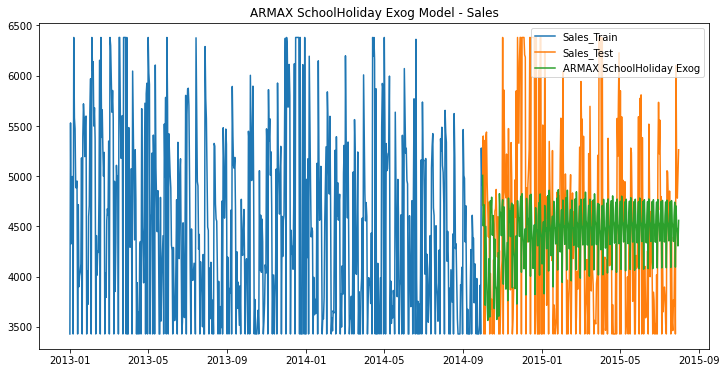

In [293]:
plt.figure(figsize=(12,6)) 
plt.plot( df_train['Sales'], label='Sales_Train')
plt.plot(df_test['Sales'], label='Sales_Test')
plt.plot(armax_sh_predictions, label='ARMAX SchoolHoliday Exog')
plt.legend(loc='best')
plt.title('ARMAX SchoolHoliday Exog Model - Sales')
plt.show()

### ARMAX - Promo2

In [294]:
armax_promo2_model = ARIMA(df_train['Sales'], order=(29, 0, 30), exog=df_train['Promo2'])   # p,q values from PACF,ACF plots resp
armax_promo2_model_fit = armax_promo2_model.fit()

In [295]:
armax_promo2_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  638
Model:               ARIMA(29, 0, 30)   Log Likelihood               -4974.265
Date:                Tue, 26 Apr 2022   AIC                          10072.530
Time:                        12:44:36   BIC                          10348.947
Sample:                    01-01-2013   HQIC                         10179.836
                         - 09-30-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4503.0011    126.862     35.495      0.000    4254.355    4751.647
Promo2              0   2674.025          0      1.000   -5240.993    5240.993
ar.L1          0.3459      2.238      0.155      0.877      -4.040       4.732
ar.L2          0.2292      0.525      0.436      0.663      -0.800       1.259
ar.L3         -0.1965      0.513     -0.383      0.702      -1.202       0.809
ar.L4         -0.0733      0.510     -0.144      0.886      -1.073       0.927
ar.L5          0.3215      0.401      0.801      0.423      -0.465       1.108
ar.L6          0.0088      0.812      0.011      0.991      -1.583       1.601
ar.L7         -0.1469      0.289     -0.509      0.611      -0.713       0.419
ar.L8         -0.0091      0.436     -0.021      0.983      -0.863       0.844
ar.L9         -0.0080      0.263     -0.030      0.976      -0.523       0.507
ar.L10         0.0704      0.191      0.368      0.713      -0.305       0.446
ar.L11        -0.0904      0.276     -0.327      0.743      -0.631       0.450
ar.L12        -0.1055      0.229     -0.460      0.645      -0.555       0.344
ar.L13         0.2435      0.348      0.700      0.484      -0.439       0.926
ar.L14         0.0764      0.466      0.164      0.870      -0.837       0.990
ar.L15        -0.1100      0.324     -0.339      0.734      -0.745       0.525
ar.L16         0.0194      0.299      0.065      0.948      -0.566       0.605
ar.L17        -0.0210      0.261     -0.081      0.936      -0.532       0.490
ar.L18        -0.0266      0.235     -0.113      0.910      -0.488       0.435
ar.L19        -0.0209      0.259     -0.081      0.936      -0.529       0.487
ar.L20        -0.1873      0.257     -0.728      0.466      -0.691       0.317
ar.L21         0.4195      0.443      0.947      0.343      -0.448       1.287
ar.L22        -0.1667      0.922     -0.181      0.857      -1.973       1.640
ar.L23        -0.2631      0.290     -0.907      0.364      -0.831       0.305
ar.L24         0.1618      0.638      0.253      0.800      -1.090       1.413
ar.L25         0.2020      0.296      0.682      0.495      -0.378       0.782
ar.L26        -0.2076      0.486     -0.427      0.669      -1.161       0.745
ar.L27        -0.1260      0.470     -0.268      0.789      -1.047       0.795
ar.L28         0.5548      0.352      1.577      0.115      -0.135       1.244
ar.L29        -0.1096      1.208     -0.091      0.928      -2.478       2.259
ma.L1         -0.0297      2.235     -0.013      0.989      -4.411       4.351
ma.L2         -0.0431      0.654     -0.066      0.947      -1.326       1.239
ma.L3          0.3083      0.515      0.598      0.550      -0.702       1.318
ma.L4          0.0821      0.859      0.096      0.924      -1.601       1.765
ma.L5         -0.2766      0.443     -0.625      0.532      -1.144       0.591
ma.L6         -0.0946      0.625     -0.151      0.880      -1.320       1.131
ma.L7          0.0229      0.359      0.064      0.949      -0.681       0.726
ma

In [296]:
armax_promo2_predictions = armax_promo2_model_fit.predict(start=start_index, end=end_index,exog=df_test['Promo2'])
armax_promo2_rmse = math.sqrt(mean_squared_error(df_test['Sales'],armax_promo2_predictions))
armax_promo2_rmse

878.64840883803

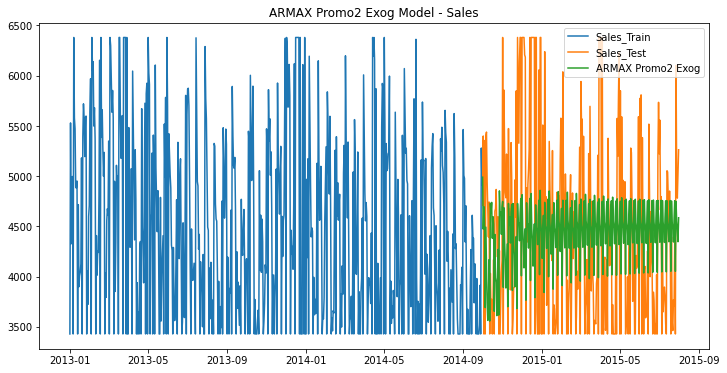

In [297]:
plt.figure(figsize=(12,6)) 
plt.plot( df_train['Sales'], label='Sales_Train')
plt.plot(df_test['Sales'], label='Sales_Test')
plt.plot(armax_promo2_predictions, label='ARMAX Promo2 Exog')
plt.legend(loc='best')
plt.title('ARMAX Promo2 Exog Model - Sales')
plt.show()

In [288]:
res_dict = {'model' : ['AR','MA','ARMA','ARMAX_Promo_Exog'], 'RMSE' : [ar_rmse,ma_rmse,arma_rmse,armax_promo_rmse]}

Now we will check whether 'Customers' time series affect our target time series i.e 'Sales'. We will use Causality Test

### Causality Test

In [57]:
import statsmodels.tsa as ts

In [58]:
 #################### causality test####################################
    ## null hypothesis is: x does not granger cause y #####################
    ## if value of p is less than 0.05 then granger causality exists ######
    
CausalitySales=(ts.stattools.grangercausalitytests(final_store1_df[['Sales','Customers']].dropna(),1))
print(CausalitySales)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=114.7766, p=0.0000  , df_denom=938, df_num=1
ssr based chi2 test:   chi2=115.1437, p=0.0000  , df=1
likelihood ratio test: chi2=108.6256, p=0.0000  , df=1
parameter F test:         F=114.7766, p=0.0000  , df_denom=938, df_num=1
{1: ({'ssr_ftest': (114.77657153055853, 2.4027861729009515e-25, 938.0, 1), 'ssr_chi2test': (115.14366077852407, 7.31978993610261e-27, 1), 'lrtest': (108.62561271973027, 1.9602517398269275e-25, 1), 'params_ftest': (114.77657153044693, 2.4027861730214856e-25, 938.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024CDE415B50>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024CBFA90E50>, array([[0., 1., 0.]])])}


In [59]:
CausalityCust=(ts.stattools.grangercausalitytests(final_store1_df[['Customers','Sales']].dropna(),1))
print(CausalityCust)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=46.8552 , p=0.0000  , df_denom=938, df_num=1
ssr based chi2 test:   chi2=47.0051 , p=0.0000  , df=1
likelihood ratio test: chi2=45.8688 , p=0.0000  , df=1
parameter F test:         F=46.8552 , p=0.0000  , df_denom=938, df_num=1
{1: ({'ssr_ftest': (46.85521578271265, 1.3794563848695301e-11, 938.0, 1), 'ssr_chi2test': (47.00507254960832, 7.0803217674292235e-12, 1), 'lrtest': (45.86875546260853, 1.2644669526608565e-11, 1), 'params_ftest': (46.855215782538394, 1.3794563849863704e-11, 938.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024CDE431F10>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000024CDE2F3970>, array([[0., 1., 0.]])])}


### VAR

As we can see that p values are below 0.05 and hence we can say that 'Customers' time series influences 'Sales' time series. So we can use both of these in a VAR model.

In [311]:
var_model = sm.tsa.VARMAX(df_train[['Sales','Customers']], order=(21,0), trend='n')
var_model_fit = var_model.fit(maxiter=1000, disp=False)
var_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  638
Model:                            VAR(21)   Log Likelihood               -7825.231
Date:                    Tue, 26 Apr 2022   AIC                          15824.462
Time:                            14:05:49   BIC                          16212.337
Sample:                        01-01-2013   HQIC                         15975.036
                             - 09-30-2014                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             0.59, 0.00   Jarque-Bera (JB):          34.58, 3.30
Prob(Q):                        0.44, 0.95   Prob(JB):                   0.00, 0.19
Heteroskedasticity (H):         0.76, 0.83   Skew:                      -0.04, 0.17
Prob(H) (two-sided):            0.05, 0.17   Kurtosis:                   4.14, 3.04
                            Results for equation Sales                           
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
L1.Sales          0.5232      0.119      4.397      0.000       0.290       0.756
L1.Customers     -3.8279      1.355     -2.825      0.005      -6.484      -1.172
L2.Sales          0.1267      0.131      0.970      0.332      -0.129       0.383
L2.Customers      0.9239      1.439      0.642      0.521      -1.897       3.745
L3.Sales          0.0852      0.136      0.626      0.531      -0.181       0.352
L3.Customers      1.3002      1.477      0.880      0.379      -1.595       4.195
L4.Sales         -0.3024      0.132     -2.287      0.022      -0.562      -0.043
L4.Customers      2.9657      1.459      2.032      0.042       0.105       5.826
L5.Sales         -0.1948      0.134     -1.457      0.145      -0.457       0.067
L5.Customers      2.1830      1.487      1.468      0.142      -0.732       5.098
L6.Sales         -0.2646      0.140     -1.889      0.059      -0.539       0.010
L6.Customers      2.0708      1.545      1.340      0.180      -0.957       5.099
L7.Sales         -0.1816      0.134     -1.358      0.175      -0.444       0.081
L7.Customers      3.4584      1.454      2.379      0.017       0.609       6.308
L8.Sales         -0.0097      0.139     -0.070      0.944      -0.283       0.263
L8.Customers     -0.5753      1.582     -0.364      0.716      -3.676       2.525
L9.Sales          0.0295      0.132      0.223      0.824      -0.230       0.289
L9.Customers     -1.3923      1.462     -0.952      0.341      -4.258       1.473
L10.Sales         0.0781      0.134      0.583      0.560      -0.184       0.340
L10.Customers    -0.4145      1.473     -0.281      0.778      -3.302       2.473
L11.Sales        -0.0712      0.133     -0.534      0.593      -0.332       0.190
L11.Customers     0.6247      1.522      0.410      0.682      -2.359       3.608
L12.Sales         0.1659      0.137      1.209      0.227      -0.103       0.435
L12.Customers    -2.2217      1.539     -1.444      0.149      -5.238       0.794
L13.Sales         0.0626      0.128      0.489      0.625      -0.188       0.314
L13.Customers    -0.8547      1.478     -0.578      0.563      -3.752       2.042
L14.Sales         0.6390      0.134      4.762      0.000       0.376       0.902
L14.Customers    -3.3336      1.533     -2.175      0.030      -6.337      -0.330
L15.Sales        -0.1183      0.143     -0.828      0.408      -0.399       0.162
L15.Customers    -0.1120      1.556     -0.072      0.943      -3.162       2.9

In [312]:
var_predictions = var_model_fit.predict(start=start_index, end=end_index)
var_predictions.head()

Sales   Customers
2014-10-01  4703.477962  534.405258
2014-10-02  4446.947983  510.067403
2014-10-03  4457.664315  513.184603
2014-10-04  4093.504771  493.091191
2014-10-05  3576.545274  446.599102

In [313]:
var_rmse = math.sqrt(mean_squared_error(df_test['Sales'],var_predictions['Sales']))
var_rmse

1082.4721686707203

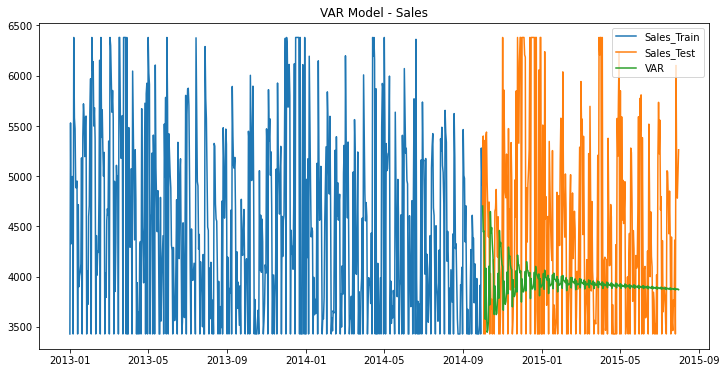

In [315]:
plt.figure(figsize=(12,6)) 
plt.plot( df_train['Sales'], label='Sales_Train')
plt.plot(df_test['Sales'], label='Sales_Test')
plt.plot(var_predictions['Sales'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

In [316]:
res_dict = {'model' : ['AR','MA','ARMA','ARMAX_Promo_Exog','VAR'], 
            'RMSE' : [ar_rmse,ma_rmse,arma_rmse,armax_promo_rmse,var_rmse]}

### VARMA

In [326]:
varma_model = sm.tsa.VARMAX(df_train[['Sales','Customers']], order=(10,10), trend='n')
varma_model_fit = varma_model.fit(maxiter=1000, disp=False)
varma_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  638
Model:                       VARMA(10,10)   Log Likelihood               -7856.494
Date:                    Tue, 26 Apr 2022   AIC                          15878.989
Time:                            17:11:16   BIC                          16249.031
Sample:                        01-01-2013   HQIC                         16022.640
                             - 09-30-2014                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             0.00, 0.18   Jarque-Bera (JB):          42.21, 2.00
Prob(Q):                        0.96, 0.68   Prob(JB):                   0.00, 0.37
Heteroskedasticity (H):         0.79, 0.88   Skew:                      -0.03, 0.13
Prob(H) (two-sided):            0.09, 0.37   Kurtosis:                   4.26, 3.06
                             Results for equation Sales                             
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
L1.Sales             0.9372      1.180      0.794      0.427      -1.375       3.249
L1.Customers        -7.3345     40.215     -0.182      0.855     -86.155      71.486
L2.Sales             0.0199      2.753      0.007      0.994      -5.377       5.416
L2.Customers         1.9735     13.812      0.143      0.886     -25.098      29.045
L3.Sales            -0.2193      1.387     -0.158      0.874      -2.937       2.498
L3.Customers         4.3834     18.736      0.234      0.815     -32.338      41.105
L4.Sales            -0.0045      1.086     -0.004      0.997      -2.133       2.124
L4.Customers         2.5797     14.181      0.182      0.856     -25.215      30.374
L5.Sales            -0.7209      1.168     -0.617      0.537      -3.011       1.569
L5.Customers         5.9743     11.402      0.524      0.600     -16.373      28.322
L6.Sales            -0.5599      2.287     -0.245      0.807      -5.043       3.923
L6.Customers         2.9047     16.793      0.173      0.863     -30.009      35.819
L7.Sales            -0.1752      1.614     -0.109      0.914      -3.339       2.988
L7.Customers         6.7396     10.781      0.625      0.532     -14.391      27.871
L8.Sales            -0.0369      1.055     -0.035      0.972      -2.105       2.031
L8.Customers        -3.6845     23.121     -0.159      0.873     -49.001      41.632
L9.Sales            -0.0680      0.956     -0.071      0.943      -1.941       1.805
L9.Customers         0.5751     12.665      0.045      0.964     -24.247      25.397
L10.Sales            0.2702      0.672      0.402      0.688      -1.047       1.587
L10.Customers       -1.2331      7.961     -0.155      0.877     -16.837      14.371
L1.e(Sales)         -0.4221      1.176     -0.359      0.720      -2.728       1.884
L1.e(Customers)      4.4930     40.327      0.111      0.911     -74.547      83.533
L2.e(Sales)          0.0160      1.891      0.008      0.993      -3.690       3.722
L2.e(Customers)      0.0580     12.606      0.005      0.996     -24.649      24.765
L3.e(Sales)          0.1346      1.006      0.134      0.894      -1.837       2.106
L3.e(Customers)     -2.0802     12.238     -0.170      0.865     -26.065      21.905
L4.e(Sales)         -0.4006      0.992     -0.404      0.686      -2.346       1.545
L4.e(Customers)      1.2254     11.122      0.110      0.912     -20.573      23.024
L5.e(Sales)          0.3662      1.521      0.241      0.810     

In [327]:
varma_predictions = varma_model_fit.predict(start=start_index, end=end_index)
varma_predictions.head()

Sales   Customers
2014-10-01  4760.027031  534.565838
2014-10-02  4616.733585  522.998608
2014-10-03  4460.882522  504.996067
2014-10-04  4341.114191  513.458258
2014-10-05  3479.967480  429.798780

In [328]:
varma_rmse = math.sqrt(mean_squared_error(df_test['Sales'],varma_predictions['Sales']))
varma_rmse

1077.0356447202

In [329]:
res_dict = {'model' : ['AR','MA','ARMA','ARMAX_Promo_Exog','VAR','VARMA'], 
            'RMSE' : [ar_rmse,ma_rmse,arma_rmse,armax_promo_rmse,var_rmse,varma_rmse]}

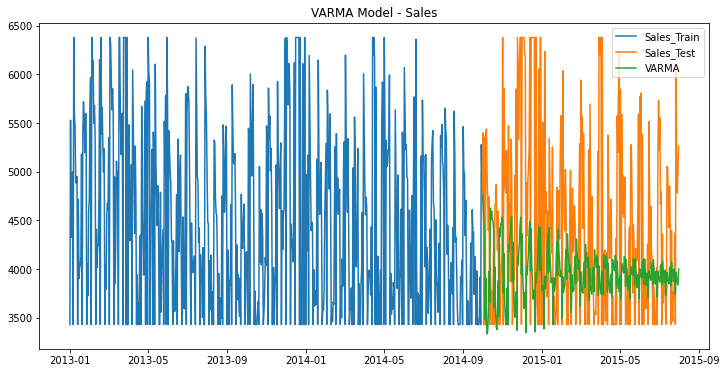

In [330]:
plt.figure(figsize=(12,6)) 
plt.plot( df_train['Sales'], label='Sales_Train')
plt.plot(df_test['Sales'], label='Sales_Test')
plt.plot(varma_predictions['Sales'], label='VARMA')
plt.legend(loc='best')
plt.title('VARMA Model - Sales')
plt.show()

### VARMAX - Promo

In [334]:
varmax_promo_model = sm.tsa.VARMAX(df_train[['Sales','Customers']], order=(15,15), trend='n',exog=df_train['Promo'])
varmax_promo_model_fit = varmax_promo_model.fit(maxiter=1000, disp=False)
varmax_promo_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                             
==================================================================================
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  638
Model:                      VARMAX(15,15)   Log Likelihood               -8044.995
Date:                    Tue, 26 Apr 2022   AIC                          16339.991
Time:                            18:03:16   BIC                          16897.283
Sample:                        01-01-2013   HQIC                         16556.334
                             - 09-30-2014                                         
Covariance Type:                      opg                                         
===================================================================================
Ljung-Box (L1) (Q):             4.28, 0.10   Jarque-Bera (JB):          77.92, 0.95
Prob(Q):                        0.04, 0.75   Prob(JB):                   0.00, 0.62
Heteroskedasticity (H):         0.68, 0.90   Skew:                      0.01, -0.07
Prob(H) (two-sided):            0.00, 0.43   Kurtosis:                   4.71, 3.13
                             Results for equation Sales                             
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
L1.Sales             0.3952      2.171      0.182      0.856      -3.859       4.650
L1.Customers        -0.3483     31.791     -0.011      0.991     -62.657      61.961
L2.Sales            -0.0829      1.533     -0.054      0.957      -3.087       2.921
L2.Customers         1.2057     25.040      0.048      0.962     -47.872      50.283
L3.Sales             0.0406      1.420      0.029      0.977      -2.743       2.824
L3.Customers        -1.1463     22.196     -0.052      0.959     -44.649      42.356
L4.Sales             0.1069      1.170      0.091      0.927      -2.186       2.400
L4.Customers        -1.9690     18.732     -0.105      0.916     -38.684      34.746
L5.Sales             0.3847      1.201      0.320      0.749      -1.969       2.738
L5.Customers        -3.8474     19.461     -0.198      0.843     -41.991      34.296
L6.Sales            -0.0943      1.382     -0.068      0.946      -2.803       2.615
L6.Customers         1.2091     19.706      0.061      0.951     -37.413      39.832
L7.Sales            -0.2652      1.289     -0.206      0.837      -2.791       2.260
L7.Customers         4.1399     19.550      0.212      0.832     -34.178      42.458
L8.Sales            -0.2093      1.455     -0.144      0.886      -3.061       2.643
L8.Customers         1.4952     21.744      0.069      0.945     -41.122      44.113
L9.Sales            -0.2071      1.339     -0.155      0.877      -2.832       2.417
L9.Customers         0.7610     20.585      0.037      0.971     -39.586      41.108
L10.Sales            0.2547      1.310      0.194      0.846      -2.314       2.823
L10.Customers       -0.8338     20.476     -0.041      0.968     -40.966      39.299
L11.Sales           -0.0247      1.096     -0.023      0.982      -2.172       2.122
L11.Customers        2.3726     17.235      0.138      0.891     -31.408      36.153
L12.Sales           -0.0132      1.289     -0.010      0.992      -2.540       2.514
L12.Customers        1.3501     22.072      0.061      0.951     -41.911      44.611
L13.Sales           -0.0965      1.127     -0.086      0.932      -2.305       2.112
L13.Customers        0.3319     19.317      0.017      0.986     -37.528      38.192
L14.Sales            0.2954      1.048      0.282      0.778      -1.759       2.350
L14.Customers        2.0657     18.502      0.112      0.911     -34.197      38.328
L15.Sales           -0.1617      1.099     -0.147      0.883     

In [335]:
varmax_predictions = varmax_promo_model_fit.predict(start=start_index, end=end_index,exog=df_test['Promo'])
varmax_predictions.head()

Sales   Customers
2014-10-01  4846.052280  548.807183
2014-10-02  4779.806037  554.055919
2014-10-03  4652.593934  538.297893
2014-10-04  4075.407821  506.948071
2014-10-05  3266.893197  418.556245

In [336]:
varmax_rmse = math.sqrt(mean_squared_error(df_test['Sales'],varmax_predictions['Sales']))
varmax_rmse

1034.053766280497

In [340]:
res_dict = {'model' : ['AR','MA','ARMA','ARMAX_Promo_Exog','VAR','VARMA','VARMAX_Promo_Exog'], 
            'RMSE' : [ar_rmse,ma_rmse,arma_rmse,armax_promo_rmse,var_rmse,varma_rmse,varmax_rmse]}

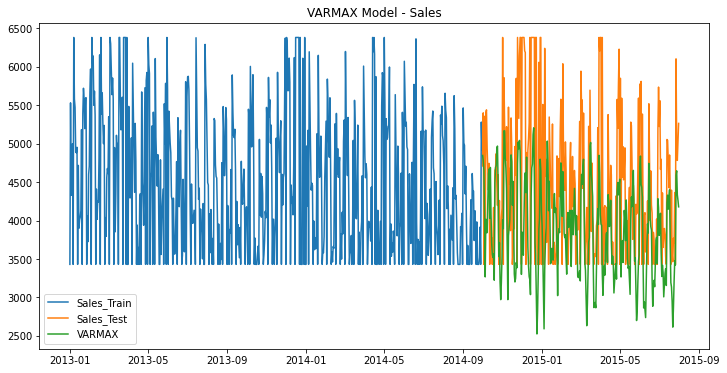

In [338]:
plt.figure(figsize=(12,6)) 
plt.plot( df_train['Sales'], label='Sales_Train')
plt.plot(df_test['Sales'], label='Sales_Test')
plt.plot(varmax_predictions['Sales'], label='VARMAX')
plt.legend(loc='best')
plt.title('VARMAX Model - Sales')
plt.show()

In [341]:
result_df = get_result_df(res_dict)
result_df

RMSE
model                         
AR                  918.575047
MA                  947.786081
ARMA                878.647862
ARMAX_Promo_Exog    764.523895
VAR                1082.472169
VARMA              1077.035645
VARMAX_Promo_Exog  1034.053766